<a href="https://colab.research.google.com/github/elenipapadopoulou4/thesis-code/blob/main/AU_Detection_GFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Train RESNET network on GFT dataset for Action Units


In [ ]:
import tensorflow as tf

import os 
import matplotlib.pyplot as plt

import numpy as np
import cv2

import csv
import openpyxl

import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout

from tensorflow.keras.callbacks import ModelCheckpoint 

from sklearn.metrics import classification_report, confusion_matrix,recall_score,f1_score,accuracy_score,multilabel_confusion_matrix
from itertools import cycle

import statistics

from sklearn.model_selection import train_test_split

from tabulate import tabulate

import matplotlib.image as mpimg

from keras.models import model_from_json
import json

from keras import backend as K


from PIL import Image

from collections import Counter

import joblib


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## GFT dataframe


GFT annotations <br>

>>GENDER
*   1 -> male
*   2 -> female

>>RACE 
*   1 -> White
*   2 -> Black
*   3 -> Hispanic
*   4 -> Asian
*   5 -> Other


>>Age <br>
*   Numeric values


In [ ]:
!unzip /content/gdrive/MyDrive/train_net/datasets/GFT/gft_aligned.zip -d /content/gft

Streaming output truncated to the last 5000 lines.
  inflating: /content/gft/011C/1194.jpg  
  inflating: /content/gft/011C/755.jpg  
  inflating: /content/gft/011C/47.jpg  
  inflating: /content/gft/011C/334.jpg  
  inflating: /content/gft/011C/493.jpg  
  inflating: /content/gft/011C/830.jpg  
  inflating: /content/gft/011C/442.jpg  
  inflating: /content/gft/011C/96.jpg  
  inflating: /content/gft/011C/784.jpg  
  inflating: /content/gft/011C/1142.jpg  
  inflating: /content/gft/011C/1523.jpg  
  inflating: /content/gft/011C/1284.jpg  
  inflating: /content/gft/011C/1255.jpg  
  inflating: /content/gft/011C/1193.jpg  
  inflating: /content/gft/011C/1634.jpg  
  inflating: /content/gft/011C/752.jpg  
  inflating: /content/gft/011C/40.jpg  
  inflating: /content/gft/011C/494.jpg  
  inflating: /content/gft/011C/333.jpg  
  inflating: /content/gft/011C/445.jpg  
  inflating: /content/gft/011C/837.jpg  
  inflating: /content/gft/011C/91.jpg  
  inflating: /content/gft/011C/783.jpg  
  i

In [ ]:
def num_to_info(category,num):
  info = None
  if category=='gender':
    if num==1: info = 'Male'
    elif num==2: info = 'Female'
  elif category=='race':
    if num==1: info = 'White'
    elif num==2: info = 'Black'
    elif num==3: info = 'Hispanic'
    elif num==4: info = 'Asian'
    elif num==5: info = 'Other'

  return info 

In [ ]:
#match column index with keyword name for age,gender,race
def input_to_col(input):
  column = None
  if input=='age':
    column = 6
  elif input=='gender':
    column = 4
  elif input =='race':
    column =5
  return column

In [ ]:
#input is either race,gender or age
def GFT_true_values(input):
  column = input_to_col(input)
  out = {}
  for num_row in range(2,sheet.max_row+1): # skip header
    out[(sheet.cell(num_row,1).value)] = sheet.cell(num_row,column).value
    print

  return out

In [ ]:
gender_true_GFT = GFT_true_values('gender')
age_true_GFT = GFT_true_values('age')
race_true_GFT = GFT_true_values('race')

Αφαιρώ την τα action units που έχουν πάντα την τιμή -1 (5ο απο το τέλος,τελεαυτάιο και πρότελευταίο)

In [ ]:
'''
df_train =  pd.read_csv(annotations_train,sep=' ',header=None)
df_test =  pd.read_csv(annotations_test,sep=' ',header=None)

df_train.drop([13, 16, 17], axis=1, inplace=True)
df_test.drop([13, 16, 17], axis=1, inplace=True)
df_train.rename(columns={0: "filename",14:13,15:14},inplace=True)
df_test.rename(columns={0: "filename",14:13,15:14},inplace=True)

'''

'\ndf_train =  pd.read_csv(annotations_train,sep=\' \',header=None)\ndf_test =  pd.read_csv(annotations_test,sep=\' \',header=None)\n\ndf_train.drop([13, 16, 17], axis=1, inplace=True)\ndf_test.drop([13, 16, 17], axis=1, inplace=True)\ndf_train.rename(columns={0: "filename",14:13,15:14},inplace=True)\ndf_test.rename(columns={0: "filename",14:13,15:14},inplace=True)\n\n'

In [ ]:
# for emotionet use validation as train and test as validation
dataset_path = '/content/gdrive/MyDrive/train_net/datasets/GFT/gft_aligned'
annotations_train = '/content/gdrive/MyDrive/train_net/datasets/GFT/gft_train_padded_for_17_aus.txt'
annotations_test = '/content/gdrive/MyDrive/train_net/datasets/GFT/gft_test_padded_for_17_aus.txt'
categories = '/content/gdrive/MyDrive/train_net/datasets/GFT/MetaData.xlsx'

In [ ]:
#read true values for GFT dataset
wb_obj = openpyxl.load_workbook(categories) 
sheet = wb_obj['Participants']

In [ ]:
'''
for i, row in df_train.iterrows():
  image_name =row['filename'][row['filename'].find('/',45)+1:]
  df_train.loc[i,'filename']=image_name
for i, row in df_test.iterrows():
  image_name =row['filename'][row['filename'].find('/',45)+1:]
  df_test.loc[i,'filename']=image_name
'''

merge annotations with categories






In [ ]:
'''
df_train['gender'] = ' '
df_train['race'] = ' '
df_train['age'] = ' '
for filename in df_train['filename']:
  df_train.loc[df_train.filename ==	filename,'gender'] =  gender_true_GFT[filename[:filename.find('/')]]
  df_train.loc[df_train.filename ==	filename,'race'] =  race_true_GFT[filename[:filename.find('/')]]
  df_train.loc[df_train.filename ==	filename,'age'] =  age_true_GFT[filename[:filename.find('/')]]

df_test['gender'] = ' '
df_test['race'] = ' '
df_test['age'] = ' '

for filename in df_test['filename']:
  df_test.loc[df_test.filename ==	filename,'gender'] =  gender_true_GFT[filename[:filename.find('/')]]
  df_test.loc[df_test.filename ==	filename,'race'] =  race_true_GFT[filename[:filename.find('/')]]
  df_test.loc[df_test.filename ==	filename,'age'] =  age_true_GFT[filename[:filename.find('/')]]

'''


In [ ]:
'''
for i, row in df_train.iterrows():
  df_train.loc[i,'filename']='/content/gft/'+row['filename']
for i, row in df_test.iterrows():
  df_test.loc[i,'filename']='/content/gft/'+row['filename']
'''

# before split

In [ ]:
#joblib.dump(df_train,'/content/gdrive/MyDrive/train_net/gft/df_train_new')
#joblib.dump(df_test,'/content/gdrive/MyDrive/train_net/gft/df_test_new')

df_train= joblib.load('/content/gdrive/MyDrive/train_net/gft/df_train_new')
df_test= joblib.load('/content/gdrive/MyDrive/train_net/gft/df_test_new')

In [ ]:
df_train

,filename,1,2,3,4,5,6,7,8,9,10,11,12,13,14,gender,race,age
0,/content/gft/001A/275.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,21
1,/content/gft/001A/276.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,21
2,/content/gft/001A/277.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,21
3,/content/gft/001A/278.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,21
4,/content/gft/001A/279.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108544,/content/gft/031C/1218.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,22
108545,/content/gft/031C/1219.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,22
108546,/content/gft/031C/1220.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,22
108547,/content/gft/031C/1221.jpg,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,22


In [ ]:
df_test

,filename,1,2,3,4,5,6,7,8,9,10,11,12,13,14,gender,race,age
0,/content/gft/005A/169.jpg,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,2,21
1,/content/gft/005A/170.jpg,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,2,21
2,/content/gft/005A/171.jpg,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,2,21
3,/content/gft/005A/172.jpg,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,2,21
4,/content/gft/005A/173.jpg,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24640,/content/gft/032C/1796.jpg,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,21
24641,/content/gft/032C/1797.jpg,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,21
24642,/content/gft/032C/1798.jpg,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,21
24643,/content/gft/032C/1799.jpg,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,21


In [ ]:
#create video column
def get_video_from_filename(row):
    filename = row['filename']
    video_name = (filename[filename.find('/',10)+1:filename.find('/',14)])
    return video_name



In [ ]:
df_train['video'] = df_train.apply(lambda row: get_video_from_filename(row), axis=1)
df_test['video'] = df_test.apply(lambda row: get_video_from_filename(row), axis=1)


##Show data

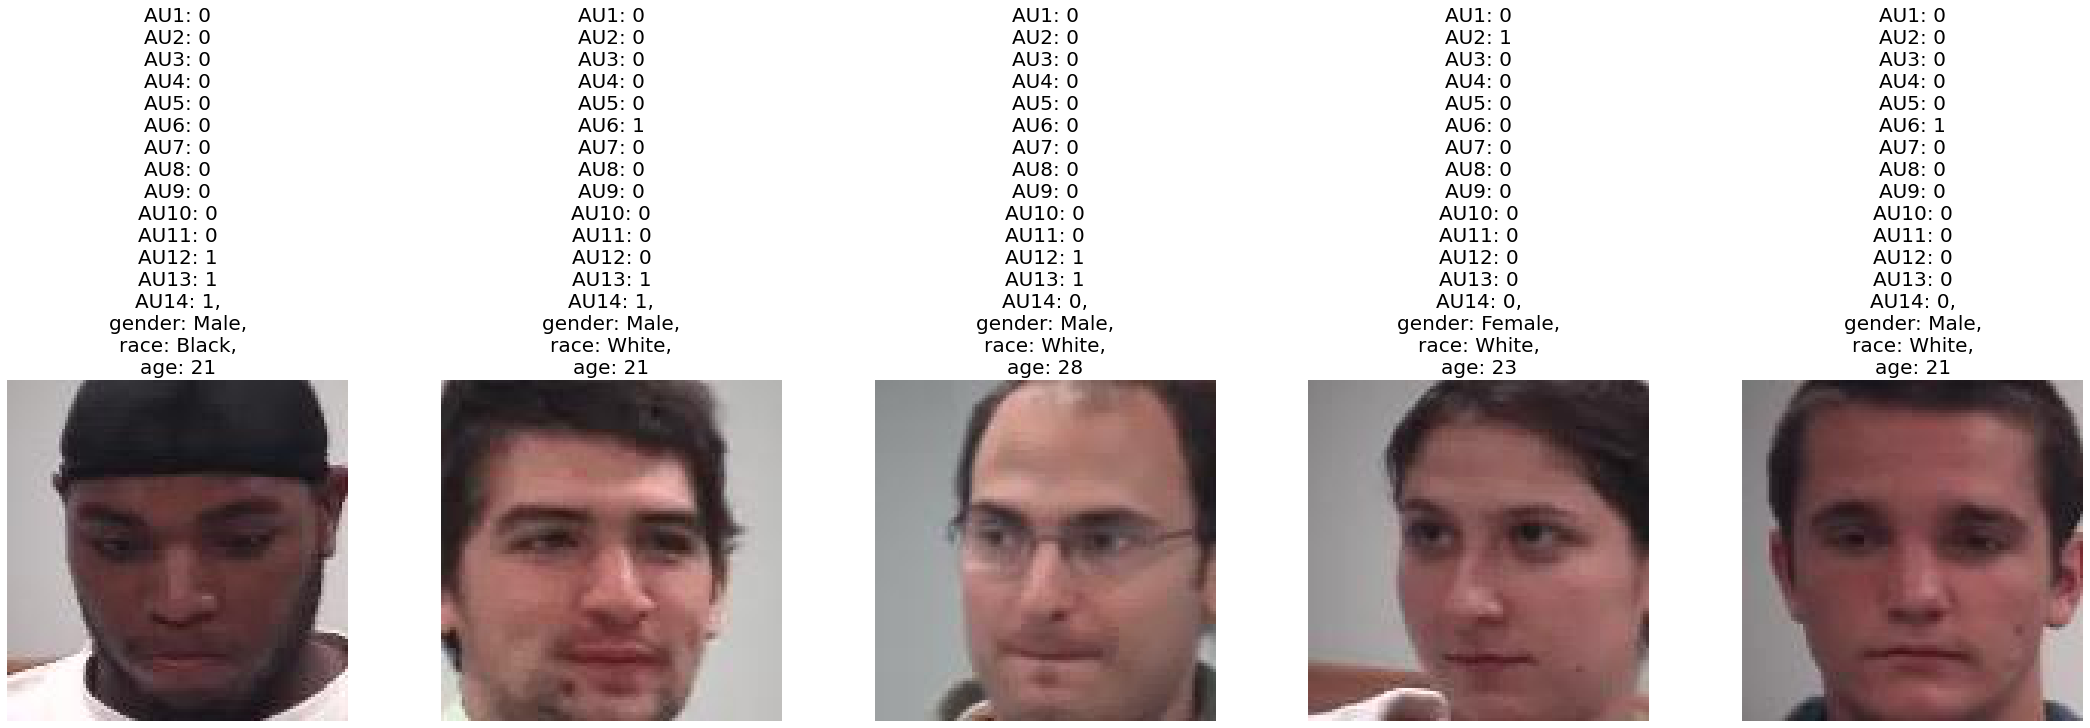

In [ ]:
num_images = 5
fig, axs = plt.subplots(figsize=(30, 10), ncols=num_images, constrained_layout=True)
for i in range(num_images):
  index = 3000*i
  image  =  mpimg.imread(df_train['filename'][index])
  axs[i].imshow(image)  
  axs[i].set_title('AU1: {}\nAU2: {}\nAU3: {}\nAU4: {}\nAU5: {}\nAU6: {}\nAU7: {}\nAU8: {}\nAU9: {}\nAU10: {}\nAU11: {}\nAU12: {}\nAU13: {}\nAU14: {},\ngender: {},\nrace: {},\nage: {}'.format(
      df_train[1][index],df_train[2][index],df_train[3][index],df_train[4][index],df_train[5][index],df_train[6][index],
      df_train[7][index],df_train[8][index],df_train[9][index],df_train[10][index],df_train[11][index],df_train[12][index],
      df_train[13][index],df_train[14][index],num_to_info('gender',df_train['gender'][index]),num_to_info('race',df_train['race'][index]),df_train['age'][index]),fontsize = 20)
  axs[i].axis("off")

## data preprocessing 

In [ ]:
# load one image
image = Image.open(df_train['filename'][122])
# convert image to numpy array
data = np.asarray(image)

In [ ]:
print(np.shape(data))

(112, 112, 3)


Οι εικόνες που στέλνουμε στο νευρωνικό δίκτυο είναι resized σε 112*112 και είναι έγχρωμες (τιμές απο 0-255). <br>
 Έτσι στο δίκτυο οι πίνακες είναι μεγέθους 112 * 112 * 3. 

In [ ]:
# get batches of tensor image data (rescaled to 0-1)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col='filename',
    y_col=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    target_size=(112, 112),
    color_mode='rgb',
    class_mode='raw', #multilabel output numpy array of values in y_col column(s),
    batch_size=batch_size 
  )

validation_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col="filename",
    y_col=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    target_size=(112, 112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size
  )


Found 108549 validated image filenames.
Found 24645 validated image filenames.


## Class distribution

Action Units that are activated

In [ ]:
print("Actiavated AU ratio for all sets")
set_names = ['train','test']
data = []
ratio_train = []
ratio_val = []
ratio_test = []
aus = []
for au in range(1,15):  
  aus.append(au)    
  ratio_train.append(len(df_train[df_train[au]==1])/len(df_train))
  ratio_test.append(len(df_test[df_test[au]==1])/len(df_test))


table = zip(aus,ratio_train, ratio_test)
print(tabulate(table, headers=['AUs','train ratio','test ratio'], floatfmt=".4f"))




Actiavated AU ratio for all sets
  AUs    train ratio    test ratio
-----  -------------  ------------
    1         0.0370        0.0448
    2         0.1338        0.1221
    3         0.0367        0.0339
    4         0.0240        0.0161
    5         0.2836        0.2770
    6         0.4551        0.4507
    7         0.0140        0.0153
    8         0.2463        0.2467
    9         0.1375        0.1505
   10         0.2950        0.2916
   11         0.1063        0.0954
   12         0.3015        0.3240
   13         0.2488        0.2549
   14         0.1426        0.1412


In [ ]:
def plot_samples(category_name,names,counter_train,counter_val):
  f, axs = plt.subplots(2,2,figsize=(12,4))
  plt.subplot(1, 2, 1) # row 1, col 2 index 1
  plt.bar(names,counter_train,color='c',  edgecolor='black')
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.title("{} for train set".format(category_name),fontsize=15)

  plt.subplot(1, 2, 2) # row 1, col 2 index 1
  plt.bar(names,counter_val,color='c',  edgecolor='black')
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.title("{} for validation set".format(category_name),fontsize=15)
  plt.show()


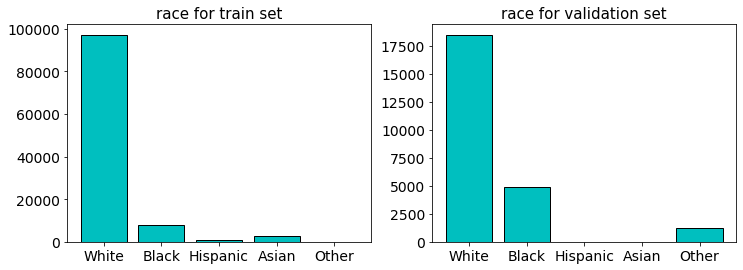

In [ ]:
race_names = ['White','Black','Hispanic','Asian','Other']
race_numbers = [1,2,3,4,5]
#train set
race_counter_train = []
for i in range(len(race_names)):
  race_counter_train.append(len(df_train[df_train['race']==race_numbers[i]]))

#val set
race_counter_val = []
for i in range(len(race_names)):
  race_counter_val.append(len(df_test[df_test['race']==race_numbers[i]]))

plot_samples('race',race_names,race_counter_train,race_counter_val)


In [ ]:
print(race_counter_train)
print(race_counter_val)

[97155, 7989, 764, 2641, 0]
[18505, 4891, 0, 0, 1249]


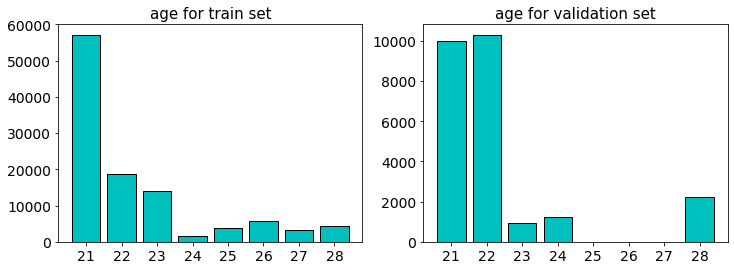

In [ ]:
age_names = list(df_train.age.unique())

age_counter_train = []
for i in range(len(age_names)):
  age_counter_train.append(len(df_train[df_train['age']==age_names[i]]))

age_counter_val = []
for i in range(len(age_names)):
  age_counter_val.append(len(df_test[df_test['age']==age_names[i]]))

plot_samples('age',age_names,age_counter_train,age_counter_val)


In [ ]:
print(age_counter_train)
print(age_counter_val)

[57179, 4269, 14004, 18644, 5797, 3274, 3896, 1486]
[9967, 2213, 916, 10300, 0, 0, 0, 1249]


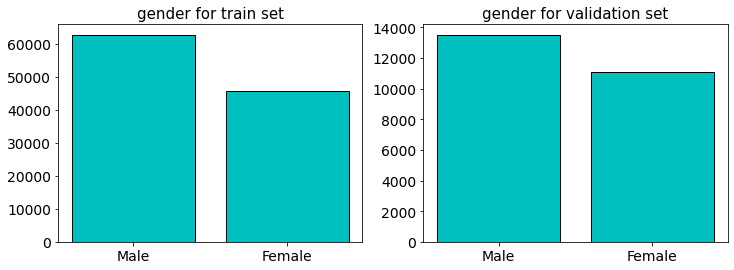

In [ ]:
gender_names = ['Male','Female']
gender_numbers = [1,2]

gender_counter_train = []
for i in range(len(gender_names)):
  gender_counter_train.append(len(df_train[df_train['gender']==gender_numbers[i]]))

gender_counter_val = []
for i in range(len(gender_names)):
  gender_counter_val.append(len(df_test[df_test['gender']==gender_numbers[i]]))

plot_samples('gender',gender_names,gender_counter_train,gender_counter_val)


In [ ]:
print(gender_counter_train)
print(gender_counter_val)

[62813, 45736]
[13525, 11120]


## training

Multilabel binary classification problem <br>
 

Οι επισημάνσεις για κάθε action unit μπορούν να πάρουν 2 τιμές: <br>
1: AU activated<br>
0: AU not activated<br>




In [ ]:
#our model
resnet_model = Sequential()

#pretrained model
pretrained_model= tf.keras.applications.ResNet50(
    include_top=False, #custume input and output layers based on our data
    weights="imagenet", #use weights from imagenet training 
    input_tensor=None,
    input_shape=(112,112,3),
    pooling='avg' , #average
)
     
resnet_model.add(pretrained_model)

In [ ]:
# see layers of resnet 50
#pretrained_model.summary()

In [ ]:
#resnet_model.add(Dense(512, activation='relu'))
#resnet_model.add(Dropout(0.2))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(14, activation='sigmoid')) 


In [ ]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_8 (Dense)             (None, 512)               1049088   
                                                                 
 dense_9 (Dense)             (None, 14)                7182      
                                                                 
Total params: 24,643,982
Trainable params: 24,590,862
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
#compile model
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss=tf.keras.losses.BinaryCrossentropy()) #from_logits=True

In [ ]:
#checkpoint 
filepath = "/content/gdrive/MyDrive/train_net/ckp_models/GFT/GFT_no/GFT_before/GFT-{epoch:02d}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_loss",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]


#fit model
history = resnet_model.fit(train_generator,validation_data=validation_generator,epochs=10,callbacks=callbacks_list)


## evaluation & threshold
 

In [ ]:
batch_size = 32
test_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col="filename",
    y_col=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    target_size=(112, 112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle = False
  )

Found 24645 validated image filenames.


In [ ]:
#return list of predictions based on threshold
def threshold_predictions(predictions,thr):
  y_pred = [1 if i>=thr else 0 for i in predictions]
  return y_pred
  

In [ ]:
# calculates transformed predictions and returns mean of macro f1 score for all labels/prediction sets 
def macro_f1(labels,predictions,thr):
  predictions_thr =threshold_predictions(predictions,thr)
  f1 = f1_score(labels,predictions_thr,average='binary')
  return f1


In [ ]:
# dictionaries with keys   -- > AUs (14)
#                   values -- > labels/predictions of AU (len(test_images))

def labels_predictions_aus(labels,predictions):
  aus_labels = {k: [] for k in range(1,15)}
  aus_predictions =  {k: [] for k in range(1,15)}

  for l,p in zip(labels,predictions):
    for au in range(1,15):
      aus_labels[au].append(l[au-1])
      aus_predictions[au].append(p[au-1])
  return(aus_labels,aus_predictions)




In [ ]:
# calculates eachf1 & returns mean of all 14 f1 scores
def mean_macro_f1(aus_labels,aus_predictions,thr):
  f1_all = []
  for au in range(1,15):
    f1 = macro_f1(aus_labels[au],aus_predictions[au],thr)
    f1_all.append(f1)
  return (statistics.mean(f1_all))


In [ ]:
# return labels and predictions for each category
def labels_predictions__category(df_test,test_generator,labels,predictions,category_list,category_name):
  labels_cat = {key: [] for key in category_list}
  predictions_cat = {key: [] for key in category_list}
  category_counter = {key: [] for key in category_list} # values are list of indexes of each category

  for i,name in enumerate(test_generator.filenames):  
    category_filename = df_test.loc[df_test['filename'] == name, category_name].item()
    for cat in category_list:
      if category_name =='age':
        if category_filename >= int(cat[0:2]) and category_filename <= int(cat[3:5]):
          category_counter[cat].append(i)
          labels_cat[cat].append(labels[i])
          predictions_cat[cat].append(predictions[i])
      else:
        if category_filename == cat:
          category_counter[cat].append(i)
          labels_cat[cat].append(labels[i])
          predictions_cat[cat].append(predictions[i])
        
    
  return labels_cat,predictions_cat,category_counter

In [ ]:
# calculates and shows results
def results_category(df_test,split,category_list,category_name,y_true,y_pred,thr,category_counter):
  print("{} scores {} split".format(category_name,split))
  data = []
  for cat in category_list:
    if category_name =='age': name = cat
    else: name = num_to_info(category_name,cat)
    aus_labels_cat,aus_predictions_cat = labels_predictions_aus(y_true[cat],y_pred[cat])
    data.append([name,len(np.unique(indexes_to_videos(df_test,category_counter[cat]))),len(category_counter[cat]), mean_macro_f1(aus_labels_cat,aus_predictions_cat,thr)])
  print(tabulate(data, headers=[category_name, "#videos" ,"#frames","mean macro f1 score"]))
  print()



In [ ]:
#give indexes of category and out
def indexes_to_videos(df_test,counter):
  videos = df_test.video.unique()
  videos_counter = []
  for i in counter:
    video = df_test.iloc[i]['video']
    videos_counter.append(video)
  return videos_counter


In [ ]:
models_labels = {}
models_predictions = {}
models_directory = '/content/gdrive/MyDrive/train_net/ckp_models/GFT/GFT_no/GFT_before'
for saved_model in (os.listdir(models_directory)):
  model = tf.keras.models.load_model(os.path.join(models_directory,saved_model))
  models_labels[saved_model[:-3]] = test_generator.labels
  models_predictions[saved_model[:-3]] = model.predict(test_generator)


In [ ]:
for model_name in models_labels.keys():
  aus_labels,aus_predictions = labels_predictions_aus(models_labels[model_name],models_predictions[model_name])
  print("Model Name: =",model_name)
  for thr in np.arange(0,1.1,0.1):
    mean_f1 = mean_macro_f1(aus_labels,aus_predictions,thr)
    print(" Threshold: {} F1 score: {}".format(np.round(thr,2),np.round(mean_f1,4)))


Model Name: = GFT-06
 Threshold: 0.0 F1 score: 0.2794
 Threshold: 0.1 F1 score: 0.5185
 Threshold: 0.2 F1 score: 0.5107
 Threshold: 0.3 F1 score: 0.4987
 Threshold: 0.4 F1 score: 0.4838
 Threshold: 0.5 F1 score: 0.465
 Threshold: 0.6 F1 score: 0.4487
 Threshold: 0.7 F1 score: 0.4306
 Threshold: 0.8 F1 score: 0.4033
 Threshold: 0.9 F1 score: 0.3643
 Threshold: 1.0 F1 score: 0.0022


In [ ]:
best_model_name = 'GFT-06'
best_model = tf.keras.models.load_model(os.path.join(models_directory,"{}.h5".format(best_model_name)))
best_threshold = 0.1

In [ ]:
# labels&predictions for each category
RACES =[1,2,3,4,5]
y_true_race,y_pred_race,counter_race = labels_predictions__category(df_test,test_generator,models_labels[best_model_name],models_predictions[best_model_name],RACES,'race')

GENDERS = [1,2]
y_true_gender,y_pred_gender,counter_gender = labels_predictions__category(df_test,test_generator,models_labels[best_model_name],models_predictions[best_model_name],GENDERS,'gender')

AGES = ['21-22','23-25','26-28']
y_true_age,y_pred_age,counter_age = labels_predictions__category(df_test,test_generator,models_labels[best_model_name],models_predictions[best_model_name],AGES,'age')



In [ ]:
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
print("GFT")
print("NO AUG")
print("BEFORE split")
aus_labels_best, aus_predictions_best = labels_predictions_aus(models_labels[best_model_name],models_predictions[best_model_name])
data = [[mean_macro_f1(aus_labels_best,aus_predictions_best,best_threshold)]]
print(tabulate(data, headers=[" macro f1 score"]))
print()
results_category(df_test,'before',RACES,'race',y_true_race,y_pred_race,best_threshold,counter_race)
results_category(df_test,'before',GENDERS,'gender',y_true_gender,y_pred_gender,best_threshold,counter_gender)
results_category(df_test,'before',AGES,'age',y_true_age,y_pred_age,best_threshold,counter_age)


GFT
NO AUG
BEFORE split
   macro f1 score
-----------------
         0.518491

race scores before split
race        #videos    #frames    mean macro f1 score
--------  ---------  ---------  ---------------------
White            13      18505               0.488417
Black             4       4891               0.525621
Hispanic          0          0               0
Asian             0          0               0
Other             1       1249               0.412003

gender scores before split
gender      #videos    #frames    mean macro f1 score
--------  ---------  ---------  ---------------------
Male             10      13525               0.44789
Female            8      11120               0.551975

age scores before split
age      #videos    #frames    mean macro f1 score
-----  ---------  ---------  ---------------------
21-22         14      20267               0.514132
23-25          2       2165               0.458393
26-28          2       2213               0.494313



## Visualize predictions

In [ ]:
print("Labels and Predictions for one batch")
X,y = test_generator.next()
prediction_show = best_model.predict(X)
for i in range(batch_size):
  print("truth:      {}\nprediction: {} ".format(y[i],np.array(threshold_predictions(prediction_show[i],best_threshold))))


Labels and Predictions for one batch
truth:      [0 1 0 0 0 1 0 0 0 0 0 1 0 1]
prediction: [0 0 0 0 0 0 0 0 0 0 0 1 0 1] 
truth:      [0 1 0 0 0 1 0 0 0 0 0 1 0 1]
prediction: [0 1 0 0 0 0 0 0 0 0 1 1 0 1] 
truth:      [0 1 0 0 0 1 0 0 0 0 0 1 0 1]
prediction: [0 1 0 0 0 0 0 0 0 0 1 1 1 1] 
truth:      [0 1 0 0 0 1 0 0 0 0 0 1 0 1]
prediction: [0 1 0 0 0 0 0 0 0 0 1 1 1 0] 
truth:      [0 1 0 0 0 1 0 0 0 0 0 1 0 1]
prediction: [0 1 0 0 0 0 0 0 0 0 1 1 1 1] 
truth:      [1 1 0 0 0 1 0 0 0 0 0 1 0 0]
prediction: [0 1 0 0 0 0 0 0 0 0 1 1 0 1] 
truth:      [1 1 1 0 0 1 0 0 0 0 0 0 1 0]
prediction: [0 1 0 0 0 0 0 0 0 0 0 1 1 0] 
truth:      [1 1 1 0 0 1 0 0 0 0 0 1 1 0]
prediction: [0 1 0 0 0 0 0 0 0 0 0 1 1 0] 
truth:      [1 1 1 0 0 1 0 0 0 0 0 1 1 0]
prediction: [0 1 0 0 0 0 0 0 0 0 1 1 1 1] 
truth:      [1 1 1 0 1 1 0 0 0 0 0 1 1 0]
prediction: [0 1 0 0 0 0 0 0 0 0 1 1 1 1] 
truth:      [1 1 1 0 1 1 0 0 0 0 0 1 1 0]
prediction: [0 1 0 0 0 0 0 0 0 0 1 1 1 0] 
truth:      [1 1 1 0 1 1 0 0

# after split

In [ ]:
df_all = pd.concat([df_train,df_test])
df_all= df_all.reset_index(drop=True)


In [ ]:
#create video column
def get_video_from_filename(row):
    filename = row['filename']
    video = (filename[filename.find('/',10)+1:filename.find('/',10)+5])
    return video
#create frames column
def add_frames(row):
  for video,num_frames in frames.items():
    if row['video'] == video:
      return num_frames


In [ ]:
#add new column with video value
frames = ((df_all.groupby(['video']).count())[1]).to_dict()
df_all['frames'] = df_all.apply(lambda row: add_frames(row), axis=1)


In [ ]:
df_all

,filename,1,2,3,4,5,6,7,8,9,10,11,12,13,14,gender,race,age,video,frames
0,/content/gft/001A/275.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,21,001A,1300
1,/content/gft/001A/276.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,21,001A,1300
2,/content/gft/001A/277.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,21,001A,1300
3,/content/gft/001A/278.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,21,001A,1300
4,/content/gft/001A/279.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,21,001A,1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133189,/content/gft/032C/1796.jpg,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,21,032C,1166
133190,/content/gft/032C/1797.jpg,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,21,032C,1166
133191,/content/gft/032C/1798.jpg,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,21,032C,1166
133192,/content/gft/032C/1799.jpg,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,21,032C,1166


In [ ]:
aggregation_functions = {'gender': 'first', 'race': 'first', 'age': 'first','video':'first','frames':'first'}
df_videos = df_all.groupby(df_all['video']).aggregate(aggregation_functions)

In [ ]:
df_videos

,gender,race,age,video,frames
video,,,,,
001A,1,2,21,001A,1300
001B,1,1,21,001B,1405
001C,1,1,21,001C,1364
002A,2,2,21,002A,1545
002B,1,1,28,002B,1705
...,...,...,...,...,...
031B,1,1,25,031B,897
031C,1,2,22,031C,837
032A,1,1,21,032A,1706


In [ ]:
def num_to_info(category,num):
  info = None
  if category=='gender':
    if num==1: info = 'Male'
    elif num==2: info = 'Female'
  elif category=='race':
    if num==1: info = 'White'
    elif num==2: info = 'Black'
    elif num==3: info = 'Hispanic'
    elif num==4: info = 'Asian'
    elif num==5: info = 'Other'

  return info 

#### split

In [ ]:
GENDERS = [1,2]
RACES =[1,2,3,4,5]
AGES = ['21-22','23-25','26-28']

#create bins directory
categories = []
for gender in GENDERS:
  for race in RACES:
    for age in AGES:
      categories.append(tuple((gender,race,age)))
bins = dict.fromkeys(categories)

#fill bins 
for gender in GENDERS:
  for race in RACES:
    for age in AGES:
      print("gender:",gender,"race:",race,"age:",age)
      bin = []
      for video in df_videos['video']:
        if ((df_videos.loc[df_videos.video ==	video,'gender'] == gender).bool() and 
                (df_videos.loc[df_videos.video ==	video,'race'] == race).bool() and 
                (df_videos.loc[df_videos.video ==	video,'age'] >= int(age[0:2])).bool() and 
                (df_videos.loc[df_videos.video ==	video,'age'] <= int(age[3:5])).bool()):
          bin.append(video)
      bins[(gender,race,age)] = bin
  

gender: 1 race: 1 age: 21-22
gender: 1 race: 1 age: 23-25
gender: 1 race: 1 age: 26-28
gender: 1 race: 2 age: 21-22
gender: 1 race: 2 age: 23-25
gender: 1 race: 2 age: 26-28
gender: 1 race: 3 age: 21-22
gender: 1 race: 3 age: 23-25
gender: 1 race: 3 age: 26-28
gender: 1 race: 4 age: 21-22
gender: 1 race: 4 age: 23-25
gender: 1 race: 4 age: 26-28
gender: 1 race: 5 age: 21-22
gender: 1 race: 5 age: 23-25
gender: 1 race: 5 age: 26-28
gender: 2 race: 1 age: 21-22
gender: 2 race: 1 age: 23-25
gender: 2 race: 1 age: 26-28
gender: 2 race: 2 age: 21-22
gender: 2 race: 2 age: 23-25
gender: 2 race: 2 age: 26-28
gender: 2 race: 3 age: 21-22
gender: 2 race: 3 age: 23-25
gender: 2 race: 3 age: 26-28
gender: 2 race: 4 age: 21-22
gender: 2 race: 4 age: 23-25
gender: 2 race: 4 age: 26-28
gender: 2 race: 5 age: 21-22
gender: 2 race: 5 age: 23-25
gender: 2 race: 5 age: 26-28


In [ ]:
# all frames of each bin
bin_frames_all = {}
# frames of each video
video_frames = {}
for bin,value in bins.items():
  bin_frames = []
  for video in value:
    frames = df_videos.loc[df_videos.video==video,'frames'].item()
    bin_frames.append(frames)
    video_frames[video] =frames
  bin_frames_all[bin] = sum(bin_frames)
  print("Bin: {} \nNumber of Videos: {} \nVideos: {}  \nFrames: {} \nFrames in bin: {}\n".format(bin,len(value),value,bin_frames,bin_frames_all[bin]))


Bin: (1, 1, '21-22') 
Number of Videos: 34 
Videos: ['001B', '001C', '003C', '004A', '004B', '005B', '006A', '007C', '008A', '008B', '009A', '010A', '011A', '011C', '014B', '015A', '017A', '019A', '020A', '021C', '022A', '023A', '024A', '026A', '026B', '027A', '028A', '028B', '029A', '030C', '031A', '032A', '032B', '032C']  
Frames: [1405, 1364, 1059, 1690, 1800, 1613, 1510, 1547, 1564, 1528, 1437, 1617, 1432, 1593, 1595, 1054, 1602, 1513, 1435, 963, 1685, 1415, 583, 1457, 1147, 1144, 1337, 1072, 1679, 376, 1309, 1706, 1585, 1166] 
Frames in bin: 46982

Bin: (1, 1, '23-25') 
Number of Videos: 7 
Videos: ['007B', '009C', '013A', '021B', '025C', '029B', '031B']  
Frames: [1522, 1693, 916, 1450, 1374, 1340, 897] 
Frames in bin: 9192

Bin: (1, 1, '26-28') 
Number of Videos: 8 
Videos: ['002B', '004C', '006C', '007A', '008C', '012A', '024B', '029C']  
Frames: [1705, 1626, 1618, 1586, 978, 1643, 1107, 1463] 
Frames in bin: 11726

Bin: (1, 2, '21-22') 
Number of Videos: 3 
Videos: ['001A', '0

In [ ]:
def add_subset_bin(video,video_frames,subset_bin_frames,bin_frames,subset):
  if subset=='train': per = 0.9
  elif subset =='validation':per = 0.25
  elif subset == 'test': per = 0.30

  if (subset_bin_frames)<int(per*bin_frames):
    added_video = video
    added_frames = video_frames
  else: 
    added_video = ''
    added_frames = 0
  return(added_video,added_frames)

In [ ]:
#train-val-test split
train_set_videos = []
val_set_videos = []
test_set_videos = []

for bin,value in bins.items():
  # for each bin count frames in each set
  train_bin_frames = []
  val_bin_frames = []
  test_bin_frames = []
  #frames per bin video sorted
  bin_frames = [video_frames[video] for video in value]
  sort_bin_frames = sorted(bin_frames,reverse=True)
  #videos same order
  sort_bin_videos  = [i for _,i in sorted(zip(bin_frames,value))]
  sort_bin_videos.reverse()
  subsets_list = ['train','test','validation']
  subsets = cycle(subsets_list)
  subset = next(subsets)
  subset_bin_frames = 0
  if len(sort_bin_videos)==1:
    print("bin 1, added to test!",sort_bin_videos)
    test_set_videos.append(sort_bin_videos[0])
  else:
    for video,frames in zip(sort_bin_videos,sort_bin_frames):
      print(video,frames)
      added_video,added_frames = add_subset_bin(video,frames,subset_bin_frames,bin_frames_all[bin],subset)
      print("add in {}".format(subset),added_video,added_frames)
      
      #full subset
      if added_frames == 0:
          print("{} is full!!!!!!".format(subset))
          subset = next(subsets)
          added_video,added_frames = add_subset_bin(video,frames,subset_bin_frames,bin_frames_all[bin],subset)
          print("add in {}".format(subset),added_video,added_frames)
          if added_frames == 0:
            print("{} is full!!!!!!".format(subset))
            subset = next(subsets)
            added_video,added_frames = add_subset_bin(video,frames,subset_bin_frames,bin_frames_all[bin],subset)
            print("add in {}".format(subset),added_video,added_frames)
      
    
      #video not in subset
      if subset == 'train':
        train_bin_frames.append(added_frames)
        train_set_videos.append(added_video)
        subset_bin_frames = sum(train_bin_frames)
      elif subset == 'test':
        test_bin_frames.append(added_frames)
        test_set_videos.append(added_video)
        subset_bin_frames = sum(test_bin_frames)
      elif subset == 'validation':
        val_bin_frames.append(added_frames)
        val_set_videos.append(added_video)
        subset_bin_frames = sum(val_bin_frames)
      subset = next(subsets)





004B 1800
add in train 004B 1800
032A 1706
add in test 032A 1706
004A 1690
add in validation 004A 1690
022A 1685
add in train 022A 1685
029A 1679
add in test 029A 1679
010A 1617
add in validation 010A 1617
005B 1613
add in train 005B 1613
017A 1602
add in test 017A 1602
014B 1595
add in validation 014B 1595
011C 1593
add in train 011C 1593
032B 1585
add in test 032B 1585
008A 1564
add in validation 008A 1564
007C 1547
add in train 007C 1547
008B 1528
add in test 008B 1528
019A 1513
add in validation 019A 1513
006A 1510
add in train 006A 1510
026A 1457
add in test 026A 1457
009A 1437
add in validation 009A 1437
020A 1435
add in train 020A 1435
011A 1432
add in test 011A 1432
023A 1415
add in validation 023A 1415
001B 1405
add in train 001B 1405
001C 1364
add in test 001C 1364
028A 1337
add in validation  0
validation is full!!!!!!
add in train 028A 1337
031A 1309
add in test 031A 1309
032C 1166
add in validation  0
validation is full!!!!!!
add in train 032C 1166
026B 1147
add in test  0

In [ ]:
'''
train_set_videos = [i for i in train_set_videos if i]
val_set_videos = [i for i in val_set_videos if i]
test_set_videos = [i for i in test_set_videos if i]
'''

'\ntrain_set_videos = [i for i in train_set_videos if i]\nval_set_videos = [i for i in val_set_videos if i]\ntest_set_videos = [i for i in test_set_videos if i]\n'

In [ ]:
len(train_set_videos)+len(val_set_videos)+len(test_set_videos)

96

In [ ]:
len(train_set_videos),len(val_set_videos),len(test_set_videos)

(54, 15, 27)

In [ ]:
df_train_fair = df_all[df_all['video'].isin(train_set_videos)].reset_index(drop=True)
df_validation_fair = df_all[df_all['video'].isin(val_set_videos)].reset_index(drop=True)
df_test_fair = df_all[df_all['video'].isin(test_set_videos)].reset_index(drop=True)

In [ ]:
df_train_fair

,filename,1,2,3,4,5,6,7,8,9,10,11,12,13,14,gender,race,age,video,frames
0,/content/gft/001A/275.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,21,001A,1300
1,/content/gft/001A/276.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,21,001A,1300
2,/content/gft/001A/277.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,21,001A,1300
3,/content/gft/001A/278.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,21,001A,1300
4,/content/gft/001A/279.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,21,001A,1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69613,/content/gft/032C/1796.jpg,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,21,032C,1166
69614,/content/gft/032C/1797.jpg,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,21,032C,1166
69615,/content/gft/032C/1798.jpg,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,21,032C,1166
69616,/content/gft/032C/1799.jpg,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,21,032C,1166


In [ ]:
df_validation_fair

,filename,1,2,3,4,5,6,7,8,9,10,11,12,13,14,gender,race,age,video,frames
0,/content/gft/004A/1.jpg,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,21,004A,1690
1,/content/gft/004A/2.jpg,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,21,004A,1690
2,/content/gft/004A/3.jpg,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,21,004A,1690
3,/content/gft/004A/4.jpg,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,21,004A,1690
4,/content/gft/004A/5.jpg,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,21,004A,1690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23680,/content/gft/015B/1796.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,21,015B,1535
23681,/content/gft/015B/1797.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,21,015B,1535
23682,/content/gft/015B/1798.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,21,015B,1535
23683,/content/gft/015B/1799.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,21,015B,1535


In [ ]:
df_test_fair

,filename,1,2,3,4,5,6,7,8,9,10,11,12,13,14,gender,race,age,video,frames
0,/content/gft/001C/1.jpg,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,21,001C,1364
1,/content/gft/001C/2.jpg,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,21,001C,1364
2,/content/gft/001C/3.jpg,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,21,001C,1364
3,/content/gft/001C/4.jpg,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,21,001C,1364
4,/content/gft/001C/5.jpg,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,21,001C,1364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39886,/content/gft/032B/1796.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,21,032B,1585
39887,/content/gft/032B/1797.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,21,032B,1585
39888,/content/gft/032B/1798.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,21,032B,1585
39889,/content/gft/032B/1799.jpg,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,21,032B,1585


## Class distribution

Check AU activation ratio

In [ ]:
print("Actiavated AU ratio for all sets")
set_names = ['train','validation','test']
data = []
ratio_train = []
ratio_val = []
ratio_test = []
aus = []
for au in range(1,15):  
  aus.append(au)    
  ratio_train.append(len(df_train_fair[df_train_fair[au]==1])/len(df_train_fair))
  ratio_val.append(len(df_validation_fair[df_validation_fair[au]==1])/len(df_validation_fair))
  ratio_test.append(len(df_test_fair[df_test_fair[au]==1])/len(df_test_fair))


table = zip(aus,ratio_train, ratio_val, ratio_test)
print(tabulate(table, headers=['AUs','train ratio','validation ratio','test ratio'], floatfmt=".4f"))




Actiavated AU ratio for all sets
  AUs    train ratio    validation ratio    test ratio
-----  -------------  ------------------  ------------
    1         0.0431              0.0182        0.0423
    2         0.1266              0.1233        0.1454
    3         0.0527              0.0197        0.0172
    4         0.0174              0.0070        0.0405
    5         0.3010              0.2971        0.2412
    6         0.4890              0.4467        0.3983
    7         0.0185              0.0040        0.0129
    8         0.2734              0.2443        0.2006
    9         0.1597              0.1276        0.1127
   10         0.3099              0.3135        0.2558
   11         0.1238              0.0942        0.0762
   12         0.2930              0.2745        0.3462
   13         0.2449              0.2392        0.2650
   14         0.1452              0.0802        0.1742


In [ ]:
def plot_samples(category,names,train_counter,val_counter,test_counter):
  fig, axs = plt.subplots(figsize=(20, 4), ncols=3, constrained_layout=True)
  sets = ['train','validation','test']
  for i,set_counter in enumerate([train_counter,val_counter,test_counter]):
    names_list = [name for name in names]
    axs[i].bar(names_list,set_counter,color='c',  edgecolor='black')
    axs[i].set_title("{} distribution for {} set".format(category,sets[i]),fontsize=15)

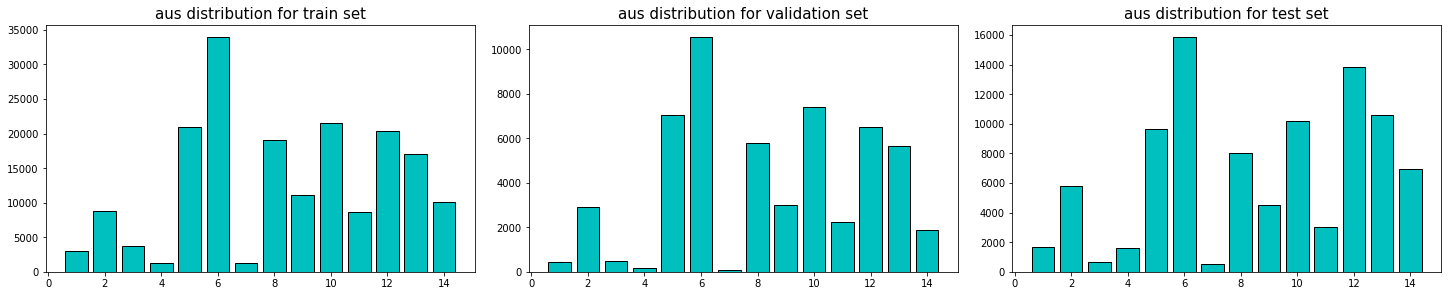

In [ ]:
final_aus = [i for i in range(1,15)]

aus_count_train = []
for i in final_aus:
  aus_count_train.append(len(df_train_fair[df_train_fair[i]==1]))

aus_count_val = []
for i in final_aus:
  aus_count_val.append(len(df_validation_fair[df_validation_fair[i]==1]))

aus_count_test = []
for i in final_aus:
  aus_count_test.append(len(df_test_fair[df_test_fair[i]==1]))

plot_samples('aus',final_aus,aus_count_train,aus_count_val,aus_count_test)


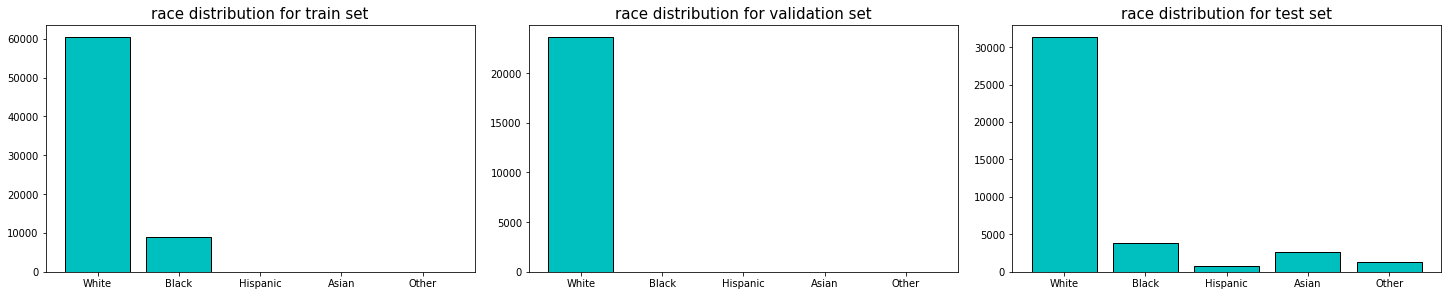

In [ ]:
race_names = ['White','Black','Hispanic','Asian','Other']
race_numbers = [1,2,3,4,5]
#train set
race_counter_train = []
for i in range(len(race_names)):
  race_counter_train.append(len(df_train_fair[df_train_fair['race']==race_numbers[i]]))

#val set
race_counter_val = []
for i in range(len(race_names)):
  race_counter_val.append(len(df_validation_fair[df_validation_fair['race']==race_numbers[i]]))

#test set
race_counter_test = []
for i in range(len(race_names)):
  race_counter_test.append(len(df_test_fair[df_test_fair['race']==race_numbers[i]])) 

plot_samples('race',race_names,race_counter_train,race_counter_val,race_counter_test)


In [ ]:
print(race_counter_train)
print(race_counter_val)
print(race_counter_test)

[60568, 9050, 0, 0, 0]
[23685, 0, 0, 0, 0]
[31407, 3830, 764, 2641, 1249]


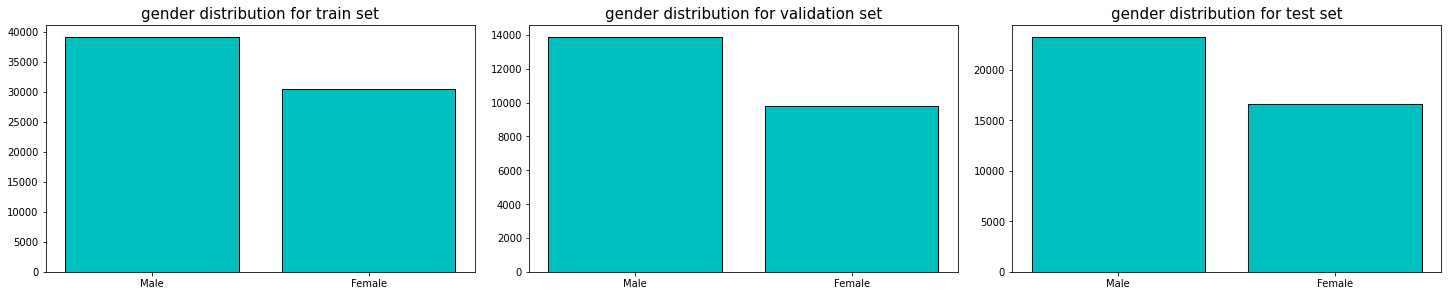

In [ ]:
gender_names = ['Male','Female']
gender_numbers = [1,2]

gender_counter_train = []
for i in range(len(gender_names)):
  gender_counter_train.append(len(df_train_fair[df_train_fair['gender']==gender_numbers[i]]))

gender_counter_val= []
for i in range(len(gender_names)):
  gender_counter_val.append(len(df_validation_fair[df_validation_fair['gender']==gender_numbers[i]]))

gender_counter_test = []
for i in range(len(gender_names)):
  gender_counter_test.append(len(df_test_fair[df_test_fair['gender']==gender_numbers[i]]))

plot_samples('gender',gender_names,gender_counter_train,gender_counter_val,gender_counter_test)


In [ ]:
print(gender_counter_train)
print(gender_counter_val)
print(gender_counter_test)

[39166, 30452]
[13907, 9778]
[23265, 16626]


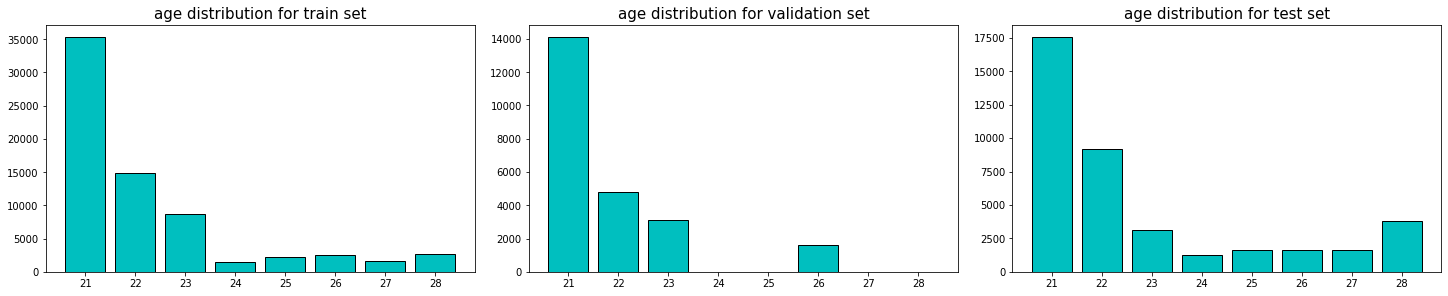

In [ ]:
age_names = list(df_train.age.unique())

age_counter_train = []
for i in range(len(age_names)):
  age_counter_train.append(len(df_train_fair[df_train_fair['age']==age_names[i]]))

age_counter_val = []
for i in range(len(age_names)):
  age_counter_val.append(len(df_validation_fair[df_validation_fair['age']==age_names[i]]))

age_counter_test = []
for i in range(len(age_names)):
  age_counter_test.append(len(df_test_fair[df_test_fair['age']==age_names[i]]))


plot_samples('age',age_names,age_counter_train,age_counter_val,age_counter_test)


In [ ]:
print(age_counter_train)
print(age_counter_val)
print(age_counter_test)

[35408, 2683, 8698, 14918, 2570, 1618, 2237, 1486]
[14145, 0, 3096, 4818, 1626, 0, 0, 0]
[17593, 3799, 3126, 9208, 1601, 1656, 1659, 1249]


##Show data

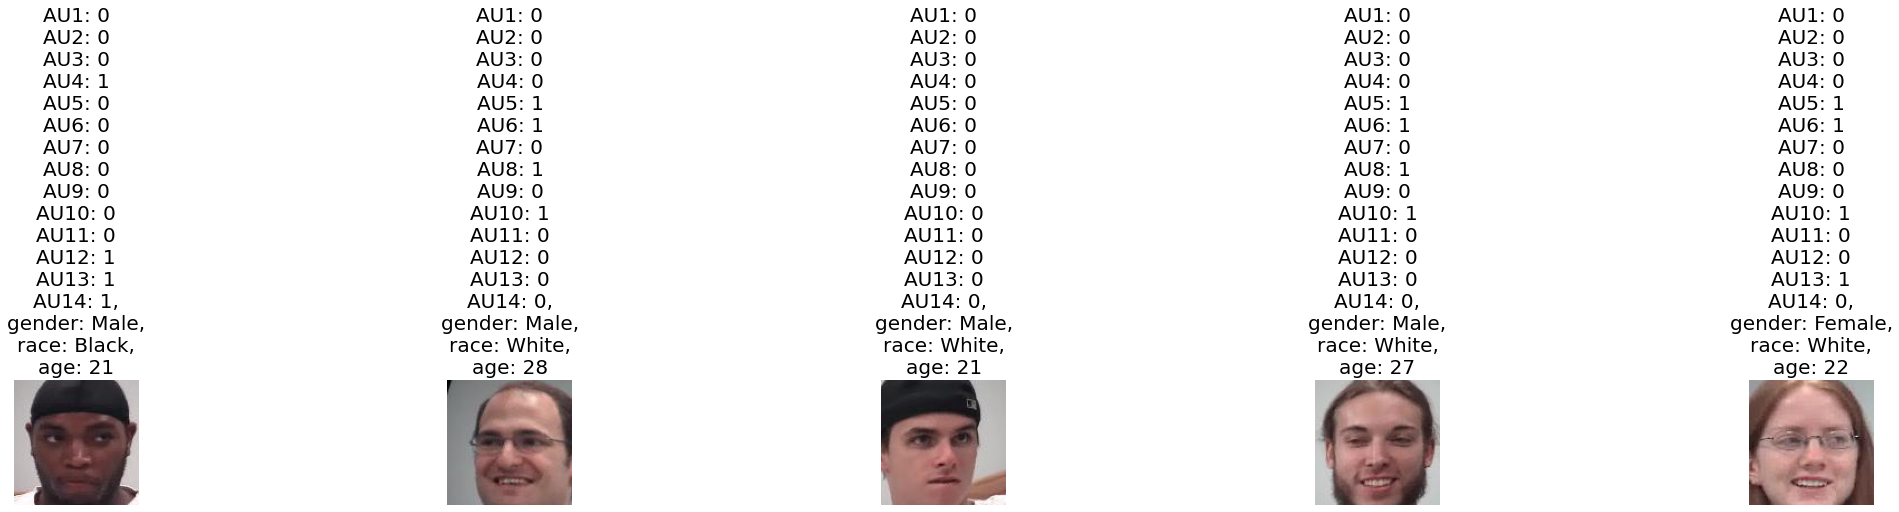

In [ ]:
num_images = 5
fig, axs = plt.subplots(figsize=(30, 7), ncols=num_images, constrained_layout=True)
for i in range(num_images):
  index =  5000*i+30
  image  =  mpimg.imread(df_train_fair['filename'][index])
  axs[i].imshow(image)  
  axs[i].set_title('AU1: {}\nAU2: {}\nAU3: {}\nAU4: {}\nAU5: {}\nAU6: {}\nAU7: {}\nAU8: {}\nAU9: {}\nAU10: {}\nAU11: {}\nAU12: {}\nAU13: {}\nAU14: {},\ngender: {},\nrace: {},\nage: {}'.format(
      df_train_fair[1][index],df_train_fair[2][index],df_train_fair[3][index],df_train_fair[4][index],df_train_fair[5][index],df_train_fair[6][index],
      df_train_fair[7][index],df_train_fair[8][index],df_train_fair[9][index],df_train_fair[10][index],df_train_fair[11][index],df_train_fair[12][index],
      df_train_fair[13][index],df_train_fair[14][index],num_to_info('gender',df_train_fair['gender'][index]),num_to_info('race',df_train_fair['race'][index]),df_train_fair['age'][index]),fontsize = 20)
  axs[i].axis("off")

## data preprocessing 

In [ ]:
# load one image
image = Image.open(df_train_fair['filename'][122])
# convert image to numpy array
data = np.asarray(image)

In [ ]:
print(np.shape(data))

(112, 112, 3)


Οι εικόνες που στέλνουμε στο νευρωνικό δίκτυο είναι resized σε 112*112 και είναι έγχρωμες (τιμές απο 0-255). <br>
 Έτσι στο δίκτυο οι πίνακες είναι μεγέθους 112 * 112 * 3. 

In [ ]:
# get batches of tensor image data (rescaled to 0-1)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
    df_train_fair,
    x_col='filename',
    y_col=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    target_size=(112, 112),
    color_mode='rgb',
    class_mode='raw', #multilabel output numpy array of values in y_col column(s),
    batch_size=batch_size 
  )

validation_generator = test_datagen.flow_from_dataframe(
    df_validation_fair,
    x_col="filename",
    y_col=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    target_size=(112, 112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size
  )

test_generator = test_datagen.flow_from_dataframe(
    df_test_fair,
    x_col="filename",
    y_col=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    target_size=(112, 112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle=False
  )


Found 69618 validated image filenames.
Found 23685 validated image filenames.
Found 39891 validated image filenames.


## training

In [ ]:
#our model
resnet_model = Sequential()

#pretrained model
pretrained_model= tf.keras.applications.ResNet50(
    include_top=False, #custume input and output layers based on our data
    weights="imagenet", #use weights from imagenet training 
    input_tensor=None,
    input_shape=(112,112,3),
    pooling='avg' , #average
)
     
resnet_model.add(pretrained_model)

In [ ]:
# see layers of resnet 50
#pretrained_model.summary()

In [ ]:
#resnet_model.add(Dense(512, activation='relu'))
#resnet_model.add(Dropout(0.2))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(14, activation='sigmoid')) 


In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 14)                7182      
                                                                 
Total params: 24,643,982
Trainable params: 24,590,862
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
#compile model
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss=tf.keras.losses.BinaryCrossentropy()) #from_logits=True



In [ ]:
#checkpoint 
filepath = "/content/gdrive/MyDrive/train_net/ckp_models/GFT/GFT_no/GFT_after/GFT-{epoch:02d}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_loss",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]


#fit model
history = resnet_model.fit(train_generator,validation_data=validation_generator,epochs=10,callbacks=callbacks_list)


Epoch 1/10
2176/2176 [==============================] - ETA: 0s - loss: 0.1313
Epoch 1: saving model to /content/gdrive/MyDrive/train_net/ckp_models/GFT/GFT_no/GFT_after/GFT-01.h5
2176/2176 [==============================] - 296s 133ms/step - loss: 0.1313 - val_loss: 0.3602
Epoch 2/10
2176/2176 [==============================] - ETA: 0s - loss: 0.0647
Epoch 2: saving model to /content/gdrive/MyDrive/train_net/ckp_models/GFT/GFT_no/GFT_after/GFT-02.h5
2176/2176 [==============================] - 289s 133ms/step - loss: 0.0647 - val_loss: 0.3913
Epoch 3/10
2176/2176 [==============================] - ETA: 0s - loss: 0.0463
Epoch 3: saving model to /content/gdrive/MyDrive/train_net/ckp_models/GFT/GFT_no/GFT_after/GFT-03.h5
2176/2176 [==============================] - 289s 133ms/step - loss: 0.0463 - val_loss: 0.4598
Epoch 4/10
2176/2176 [==============================] - ETA: 0s - loss: 0.0355
Epoch 4: saving model to /content/gdrive/MyDrive/train_net/ckp_models/GFT/GFT_no/GFT_after/GFT-0

## evaluation & threshold
 

In [ ]:
models_labels_fair = {}
models_predictions_fair = {}
models_directory_fair = '/content/gdrive/MyDrive/train_net/ckp_models/GFT/GFT_no/GFT_after'
for saved_model in (os.listdir(models_directory_fair)):
  model = tf.keras.models.load_model(os.path.join(models_directory_fair,saved_model))
  print(saved_model)
  models_labels_fair[saved_model[:-3]] = test_generator.labels
  models_predictions_fair[saved_model[:-3]] = model.predict(test_generator)


GFT-04.h5


In [ ]:
for model_name in models_labels_fair.keys():
  aus_labels_fair,aus_predictions_fair = labels_predictions_aus(models_labels_fair[model_name],models_predictions_fair[model_name])
  print("Model Name: =",model_name)
  for thr in np.arange(0,1.1,0.1):
    mean_f1 = mean_macro_f1(aus_labels_fair,aus_predictions_fair,thr)
    print(" Threshold: {} F1 score: {}".format(np.round(thr,2),np.round(mean_f1,4)))


Model Name: = GFT-04
 Threshold: 0.0 F1 score: 0.2676
 Threshold: 0.1 F1 score: 0.4622
 Threshold: 0.2 F1 score: 0.4665
 Threshold: 0.3 F1 score: 0.4652
 Threshold: 0.4 F1 score: 0.4614
 Threshold: 0.5 F1 score: 0.4536
 Threshold: 0.6 F1 score: 0.4441
 Threshold: 0.7 F1 score: 0.4307
 Threshold: 0.8 F1 score: 0.4087
 Threshold: 0.9 F1 score: 0.3734
 Threshold: 1.0 F1 score: 0.0


In [ ]:
best_model_name_fair = 'GFT-04'
best_model_fair = tf.keras.models.load_model(os.path.join(models_directory_fair,"{}.h5".format(best_model_name_fair)))
best_threshold_fair = 0.2

In [ ]:
# labels&predictions for each category
RACES =[1,2,3,4,5]
y_true_race_fair,y_pred_race_fair,counter_race = labels_predictions__category(df_test_fair,test_generator,
                                                                 models_labels_fair[best_model_name_fair],models_predictions_fair[best_model_name_fair],
                                                                 RACES,'race')

GENDERS = [1,2]
y_true_gender_fair,y_pred_gender_fair,counter_gender = labels_predictions__category(df_test_fair,test_generator,
                                                                     models_labels_fair[best_model_name_fair],models_predictions_fair[best_model_name_fair],
                                                                     GENDERS,'gender')

AGES = ['21-22','23-25','26-28']
y_true_age_fair,y_pred_age_fair,counter_age = labels_predictions__category(df_test_fair,test_generator,
                                                               models_labels_fair[best_model_name_fair],models_predictions_fair[best_model_name_fair],
                                                               AGES,'age')



In [ ]:
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
print("GFT")
print("NO AUG")
print("AFTER split")
aus_labels_best_fair, aus_predictions_best_fair = labels_predictions_aus(models_labels_fair[best_model_name_fair],models_predictions_fair[best_model_name_fair])
data = [[mean_macro_f1(aus_labels_best_fair,aus_predictions_best_fair,best_threshold_fair)]]
print(tabulate(data, headers=[" macro f1 score"]))
print()
results_category(df_test_fair,'after',RACES,'race',y_true_race_fair,y_pred_race_fair,best_threshold_fair,counter_race)
results_category(df_test_fair,'after',GENDERS,'gender',y_true_gender_fair,y_pred_gender_fair,best_threshold_fair,counter_gender)
results_category(df_test_fair,'after',AGES,'age',y_true_age_fair,y_pred_age_fair,best_threshold_fair,counter_age)


GFT
NO AUG
AFTER split
   macro f1 score
-----------------
         0.466505

race scores after split
race        #videos    #frames    mean macro f1 score
--------  ---------  ---------  ---------------------
White            20      31407               0.447235
Black             3       3830               0.412196
Hispanic          1        764               0.246698
Asian             2       2641               0.492334
Other             1       1249               0.414658

gender scores after split
gender      #videos    #frames    mean macro f1 score
--------  ---------  ---------  ---------------------
Male             16      23265               0.416057
Female           11      16626               0.491896

age scores after split
age      #videos    #frames    mean macro f1 score
-----  ---------  ---------  ---------------------
21-22         18      26801               0.473552
23-25          4       6034               0.458928
26-28          5       7056               0.40812

## Visualize predictions

In [ ]:
print("Labels and Predictions for one batch")
X,y = test_generator.next()
prediction_show = best_model_fair.predict(X)
for i in range(batch_size):
  print("truth:      {}\nprediction: {} ".format(y[i],np.array(threshold_predictions(prediction_show[i],best_threshold_fair))))


Labels and Predictions for one batch
truth:      [0 0 0 0 1 1 0 0 1 1 0 0 1 0]
prediction: [0 0 0 0 1 1 0 1 0 1 0 0 1 0] 
truth:      [0 0 0 0 1 1 0 0 1 1 0 0 1 0]
prediction: [0 0 0 0 1 1 0 1 0 1 0 0 1 0] 
truth:      [0 0 0 0 1 1 0 0 1 1 0 0 1 0]
prediction: [0 0 0 0 1 1 0 1 0 1 0 1 1 0] 
truth:      [0 0 0 0 1 1 0 0 1 1 0 0 1 0]
prediction: [0 0 0 0 1 1 0 1 0 1 0 0 1 0] 
truth:      [0 0 0 0 1 1 0 0 1 1 0 0 1 0]
prediction: [0 0 0 0 1 1 0 1 0 1 0 0 1 0] 
truth:      [0 1 0 0 1 1 0 0 1 1 0 0 1 0]
prediction: [0 0 0 0 1 1 0 1 0 1 0 0 1 0] 
truth:      [0 1 0 0 1 1 0 0 1 1 0 0 1 0]
prediction: [0 0 0 0 1 1 0 1 0 1 0 0 1 0] 
truth:      [0 1 0 0 1 1 0 0 1 1 0 0 0 0]
prediction: [0 0 0 0 1 1 0 1 0 1 0 0 1 0] 
truth:      [0 1 0 0 1 1 0 0 1 1 0 0 0 0]
prediction: [0 0 0 0 1 1 0 1 0 1 0 0 0 0] 
truth:      [0 1 0 0 1 1 0 1 1 1 0 0 0 0]
prediction: [0 0 0 0 1 1 0 1 0 1 0 0 1 0] 
truth:      [0 1 0 0 1 1 0 1 1 1 0 0 0 0]
prediction: [0 0 0 0 1 1 0 1 0 1 0 0 0 0] 
truth:      [0 1 0 0 1 1 0 1

#Results

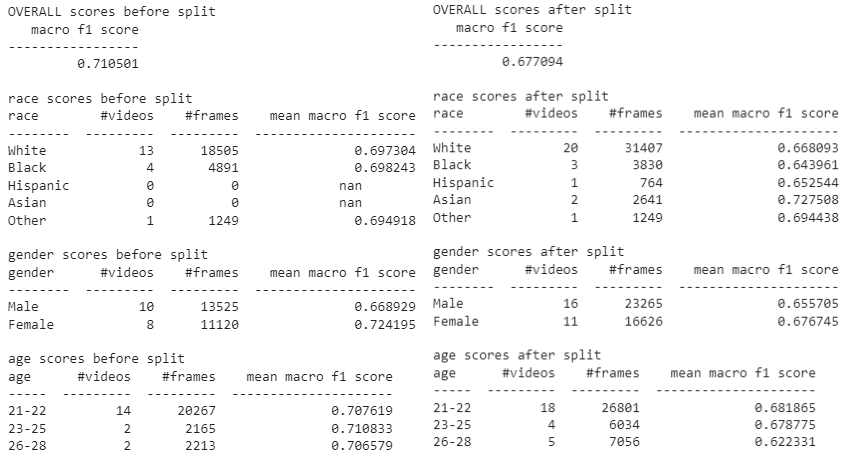

ΠΑΡΑΤΗΡΗΣΕΙΣ
* ΤΟ f1 score ΠΡΙΝ το split είναι κατά λίγο καλύτερο
* οι κατηγορίες RACE: hispanic,asian δεν έχουν δεδομένα στο test set πριν απο το split